In [1]:
import math as mat
import numpy as np
import sympy as sp
import matplotlib.pyplot as mpl
import IPython.display as disp

# MatPlotLib set fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['DejaVu Serif']

# MatPlotLib set LaTeX use
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}'

# SymPY pretty print
sp.init_printing(use_latex='mathjax')

# Strižne sile in upogibni momenti za porazdelitev sil

Imamo tri vrste porazdelitev linijske zunanje obremenitve $q(x)$

1. **konstantno**: $q(x) = q_0$
2. **linearno**: $q(x) = q_0 + q_1 x$
3. **kvadratično**: $q(x) = q_0 + q_1 x + q_2 x$
4. **sinusna**: $q(x) = q_0 + q_1 \sin(x)$

Strižna sila je potem enak

$$
V(x) = \int q(x) dx + c_1
$$

Upogibni moment ni pa nič drugega kot pa integral strižne sile $V(x)$

$$
M(x) = \int V(x) dx + c_2
$$

Da bi določili konstanti $c_1$ in $c_2$ moramo določiti vrednosti za strižno silo in upogibni moment na robu, kjer vrednosti za $V(x)$ in $M(x)$ dejansko poznamo. 

Recimo primer prostega konca pri $x=L$ imamo $V(L)=0$ in $M(L)=0$.

In [2]:
# SymPY variale definitions
q0,q1,q2 = sp.symbols('q0 q1 q2')
c1,c2 = sp.symbols('c1 c2')
x = sp.symbols('x')

# Line source/force distributions
f0 = q0
f1 = q0 + q1 * x
f2 = q0 + q1 * x + q2 * x**2
fsin = q0 + q1 * sp.sin(x)

## Primer 1: $q(x) = q_0$

In [3]:
V = sp.integrate(f0,x) + c1
M = sp.integrate(V,x) + c2

disp.display(V)
disp.display(M)

c₁ + q₀⋅x

                2
            q₀⋅x 
c₁⋅x + c₂ + ─────
              2  

In [4]:
q0v = 1; q1v = 1; q2v = 1
L = 1

# Strižna sila V(x) je na robu x=L je enaka 0
Vr = 0
c1s = sp.solve(V.subs(q0,q0v).subs(x,L) - Vr,c1)
c1v = c1s[0]
print('c1 =', c1v)

# Upogibni moment M(x) je na robu x=L je enak 0
Mr = 0
c2s = sp.solve(M.subs(q0,q0v).subs(c1,c1v).subs(x,L) - Mr,c2)
c2v = c2s[0]
print('c2 =', c2v)

c1 = -1
c2 = 1/2


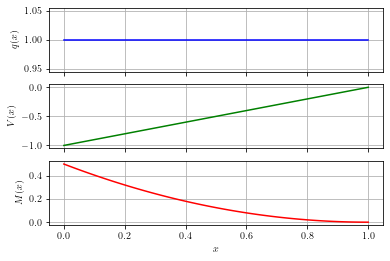

In [5]:
fq = sp.lambdify(x, f0.subs(q0,q0v))
fV = sp.lambdify(x, V.subs(q0,q0v).subs(c1,c1v))
fM = sp.lambdify(x, M.subs(q0,q0v).subs(c1,c1v).subs(c2,c2v))

xp = np.linspace(0,L,100)
qp = np.zeros(100)
for i in range(100):
    qp[i] = fq(xp[i])

fig, ax = mpl.subplots(3)

ax[0].plot(xp,qp,'b')
ax[1].plot(xp,fV(xp),'g')
ax[2].plot(xp,fM(xp),'r')

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'$q(x)$')
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$V(x)$')
ax[1].grid()

ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$M(x)$')
ax[2].grid()

fig.savefig('VM_f0.pdf')

## Primer 2: $q(x) = q_0 + q_1 x$

In [6]:
V = sp.integrate(f1,x) + c1
M = sp.integrate(V,x) + c2

disp.display(V)
disp.display(M)

                2
            q₁⋅x 
c₁ + q₀⋅x + ─────
              2  

                2       3
            q₀⋅x    q₁⋅x 
c₁⋅x + c₂ + ───── + ─────
              2       6  

In [7]:
q0v = 1; q1v = 1; q2v = 1
L = 1

# Strižna sila V(x) je na robu x=L je enaka 0
Vr = 0
c1s = sp.solve(V.subs(q0,q0v).subs(q1,q1v).subs(x,L) - Vr,c1)
c1v = c1s[0]
print('c1 =', c1v)

# Upogibni moment M(x) je na robu x=L je enak 0
Mr = 0
c2s = sp.solve(M.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v).subs(x,L) - Mr,c2)
c2v = c2s[0]
print('c2 =', c2v)

c1 = -3/2
c2 = 5/6


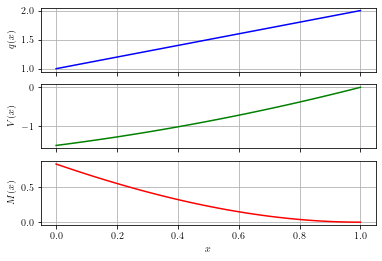

In [8]:
fq = sp.lambdify(x, f1.subs(q0,q0v).subs(q1,q1v))
fV = sp.lambdify(x, V.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v))
fM = sp.lambdify(x, M.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v).subs(c2,c2v))

xp = np.linspace(0,L,100)
qp = np.zeros(100)
for i in range(100):
    qp[i] = fq(xp[i])

fig, ax = mpl.subplots(3)

ax[0].plot(xp,qp,'b')
ax[1].plot(xp,fV(xp),'g')
ax[2].plot(xp,fM(xp),'r')

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'$q(x)$')
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$V(x)$')
ax[1].grid()

ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$M(x)$')
ax[2].grid()

fig.savefig('VM_f1.pdf')

## Primer 3: $q(x) = q_0 + q_1 x + q_2 x^2$

In [9]:
V = sp.integrate(f2,x) + c1
M = sp.integrate(V,x) + c2

disp.display(V)
disp.display(M)

                2       3
            q₁⋅x    q₂⋅x 
c₁ + q₀⋅x + ───── + ─────
              2       3  

                2       3       4
            q₀⋅x    q₁⋅x    q₂⋅x 
c₁⋅x + c₂ + ───── + ───── + ─────
              2       6       12 

In [10]:
q0v = 1; q1v = 1; q2v = 1
L = 1

# Strižna sila V(x) je na robu x=L je enaka 0
Vr = 0
c1s = sp.solve(V.subs(q0,q0v).subs(q1,q1v).subs(q2,q2v).subs(x,L) - Vr,c1)
c1v = c1s[0]
print('c1 =', c1v)

# Upogibni moment M(x) je na robu x=L je enak 0
Mr = 0
c2s = sp.solve(M.subs(q0,q0v).subs(q1,q1v).subs(q2,q2v).subs(c1,c1v).subs(x,L) - Mr,c2)
c2v = c2s[0]
print('c2 =', c2v)

c1 = -11/6
c2 = 13/12


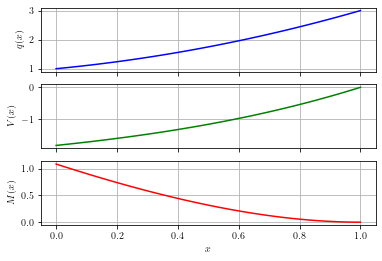

In [11]:
fq = sp.lambdify(x, f2.subs(q0,q0v).subs(q1,q1v).subs(q2,q2v))
fV = sp.lambdify(x, V.subs(q0,q0v).subs(q1,q1v).subs(q2,q2v).subs(c1,c1v))
fM = sp.lambdify(x, M.subs(q0,q0v).subs(q1,q1v).subs(q2,q2v).subs(c1,c1v).subs(c2,c2v))

xp = np.linspace(0,L,100)
qp = np.zeros(100)
for i in range(100):
    qp[i] = fq(xp[i])

fig, ax = mpl.subplots(3)

ax[0].plot(xp,qp,'b')
ax[1].plot(xp,fV(xp),'g')
ax[2].plot(xp,fM(xp),'r')

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'$q(x)$')
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$V(x)$')
ax[1].grid()

ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$M(x)$')
ax[2].grid()

fig.savefig('VM_f2.pdf')

## Primer 4: $q(x) = q_0 + q_1 \sin x$

In [12]:
V = sp.integrate(fsin,x) + c1
M = sp.integrate(V,x) + c2

disp.display(V)
disp.display(M)

c₁ + q₀⋅x - q₁⋅cos(x)

                2            
            q₀⋅x             
c₁⋅x + c₂ + ───── - q₁⋅sin(x)
              2              

In [13]:
q0v = 1; q1v = 1; q2v = 1
L = mat.pi

# Strižna sila V(x) je na robu x=pi je enaka 0
Vr = 0
c1s = sp.solve(V.subs(q0,q0v).subs(q1,q1v).subs(x,L) - Vr,c1)
c1v = c1s[0]
print('c1 =', c1v)

# Upogibni moment M(x) je na robu x=pi je enak 0
Mr = 0
c2s = sp.solve(M.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v).subs(x,L) - Mr,c2)
c2v = c2s[0]
print('c2 =', c2v)

c1 = -4.14159265358979
c2 = 8.07639485413446


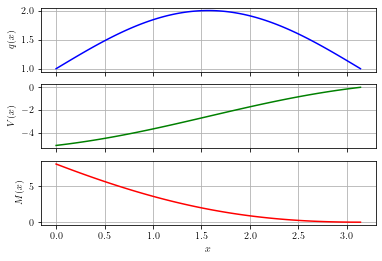

In [14]:
fq = sp.lambdify(x, fsin.subs(q0,q0v).subs(q1,q1v))
fV = sp.lambdify(x, V.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v))
fM = sp.lambdify(x, M.subs(q0,q0v).subs(q1,q1v).subs(c1,c1v).subs(c2,c2v))

xp = np.linspace(0,L,100)
qp = np.zeros(100)
for i in range(100):
    qp[i] = fq(xp[i])

fig, ax = mpl.subplots(3)

ax[0].plot(xp,qp,'b')
ax[1].plot(xp,fV(xp),'g')
ax[2].plot(xp,fM(xp),'r')

ax[0].set_xticklabels([])
ax[0].set_ylabel(r'$q(x)$')
ax[0].grid()

ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$V(x)$')
ax[1].grid()

ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$M(x)$')
ax[2].grid()

fig.savefig('VM_fsin.pdf')